<a href="https://colab.research.google.com/github/PocachipMind/Medical-Image-Processing-Model-Development/blob/main/Dicom_load_practice_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference : https://www.kaggle.com/code/micheldc55/how-to-read-dcm-dicom-data

In [1]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.5 MB/s eta 0:00:00


## 정리

Dicom 이미지 - Meta 데이터 읽어보기


pneumothorax(기흉)의 이미지, brain tumor 읽어보여 GIF로 보기.

In [55]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from pydicom.data import get_testdata_file
import logging
import sys
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 파일명 커스텀 수정

원래는 다음과 같은 dcm 파일이였으나, 코랩상에서 이상하게 0바이트로 업로드되는 버그 존재. 읽어지지가 않았음.

```
[PosixPath('/content/drive/MyDrive/Medical_AI/1.2.276.0.7230010.3.1.4.8323329.580.1517875163.537053.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/1.2.276.0.7230010.3.1.4.8323329.581.1517875163.538760.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/1.2.276.0.7230010.3.1.4.8323329.582.1517875163.546454.dcm')]
```

파일 이름으로 인한 오류로 생각하고 파일명을 단순하게 0, 1, 2 로 바꾸어 업로드 후 실습 진행


In [77]:
from pathlib import Path

BASE_PATH = Path('/content/drive/MyDrive/Medical_AI/dcm_image')
dicom_img_list = list(BASE_PATH.glob('**/*.dcm'))  # 모든 하위 폴더에서 .dcm 파일 검색

# 간단히 하기위해 3가지 dcm 파일 넣어둠 ( Git의 경우 파일 업로드 해둔것을 그냥 코랩에 올려서 사용해도됨 )
dicom_img_list

[PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/0.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/2.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/1.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/3.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/6.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/4.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/7.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/5.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/8.dcm'),
 PosixPath('/content/drive/MyDrive/Medical_AI/dcm_image/9.dcm')]

In [59]:
number_img = 0
dcm_img = pydicom.dcmread(dicom_img_list[number_img], force=True) # force=True를 설정하면 비표준 DICOM 파일도 강제로 읽을 수 있음.

In [60]:
dcm_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.580.1517875163.537053
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.580.1517875163.537053
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                      

파일을 읽어보면 file의 meta data로 JPEG baseline : JPEG Baseline 압축 파일 \\

이미지의 고유 unique ID (UID)도 적혀있음 \\

(0008, 0050) Accession Number, (0010, 0030) Patient's Birth Date 이러한 정보들은 지금 이미지에 보여지지 않는 이유는 학습이나 일반적인 이미지들은 익명화를 통해서 파일을 제거 하기 때문.


## 이미지 meta data 의미


* Rows -> 이미지의 Height
* Columns -> 이미지의 width
* SOPInstanceUID -> Unique identifier로써 slice number과 같이 포함되어있다.
* ContentDate -> pixel data가 만들어진 시간을 말한다.
* SliceThickness -> 이미지의 실제 pixel과 Pixel사이의 길이를 의미한다.
* InstanceNumber -> 이미지의 장수를 의미한다. slice number.


## 이미지 읽어오기
* plt.imshow(dataset.pixel_array, cmap=plt.cm.bone) 를 통해서 영상을 읽어옵니다.

In [42]:
def show_dcm_info(dataset):
    print("Filename.........:", dicom_img_list[number_img])
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.get("PatientID"))
    print("Patient's Age.......:", dataset.get("PatientAge"))
    print("Patient's Sex.......:", dataset.get("PatientSex"))
    print("Modality............:", dataset.get("Modality"))
    print("Body Part Examined..:", dataset.get("BodyPartExamined"))
    print("View Position.......:", dataset.get("ViewPosition"))
    print("Image position......:", dataset.get("ImagePositionPatient"))

    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

def plot_pixel_array(dataset, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

Filename.........: /content/drive/MyDrive/Medical_AI/0.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 5d2ea647-162e-4e4e-b894-e97f1f22871d, 
Patient id..........: 5d2ea647-162e-4e4e-b894-e97f1f22871d
Patient's Age.......: 51
Patient's Sex.......: F
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image position......: None
Image size.......: 1024 x 1024, 112462 bytes
Pixel spacing....: [0.19431099999999998, 0.19431099999999998]


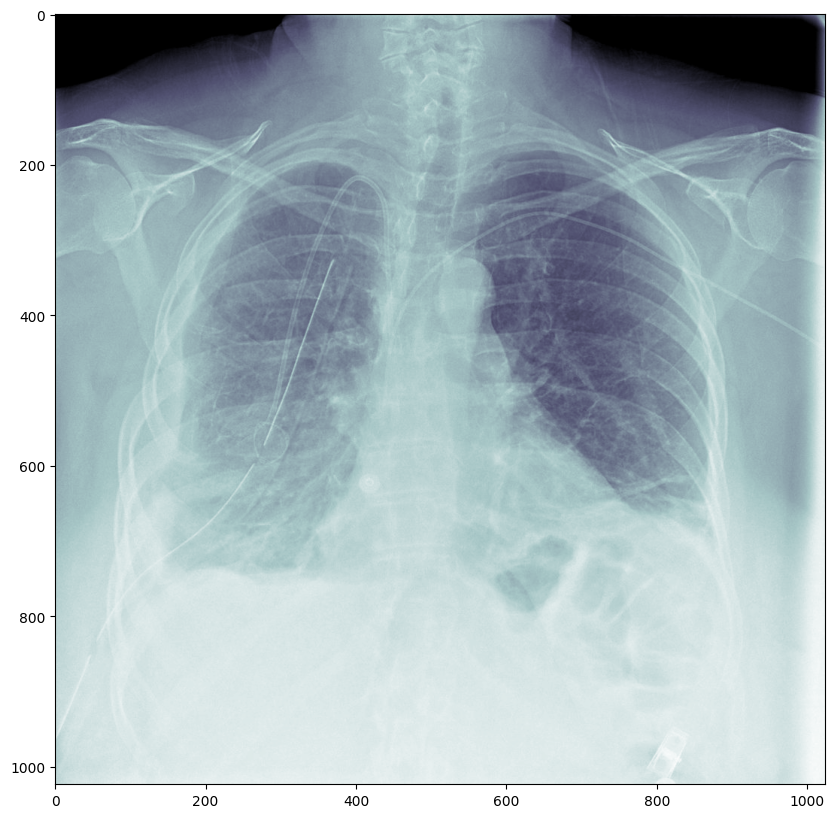

In [43]:
show_dcm_info(dcm_img)
plot_pixel_array(dcm_img)

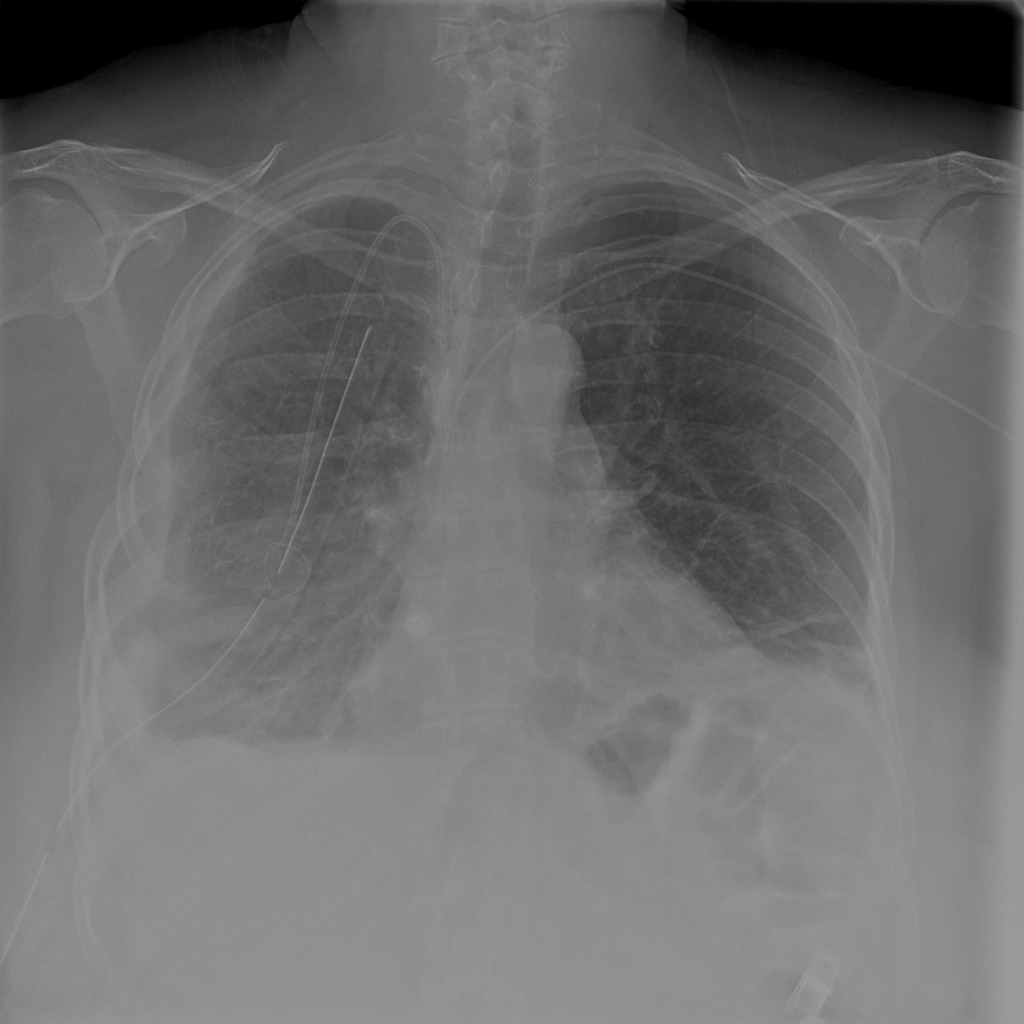

In [47]:
# 코랩환경에서 이미지를 나타낼 수 있는 함수 존재.
from google.colab.patches import cv2_imshow
cv2_imshow(dcm_img.pixel_array)

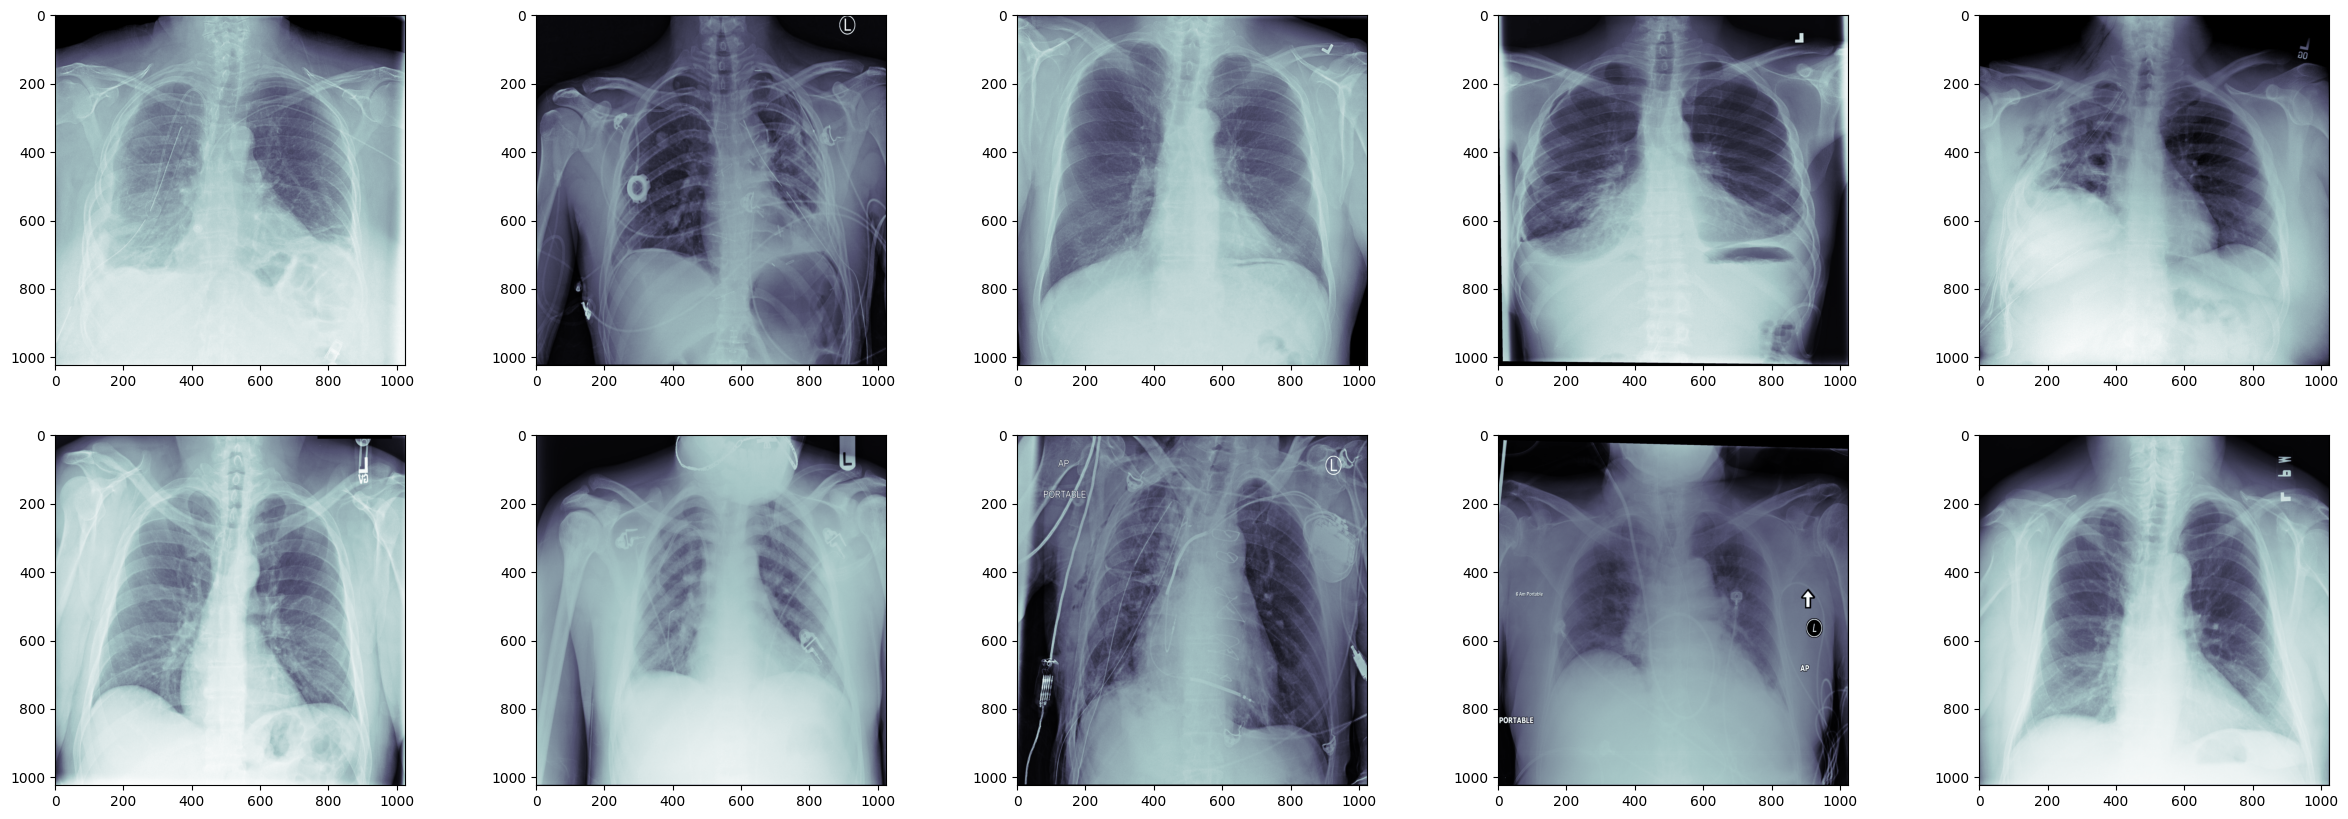

In [67]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for idx,ax in zip(range(10),axs.flatten()):
    dcm_img = pydicom.dcmread(dicom_img_list[idx]) # read dicom image ( dicom_img_list[0] : PosixPath('/content/drive/MyDrive/Medical_AI/0.dcm') )
    img = dcm_img.pixel_array # get image array
    ax.imshow(img, cmap='bone')

fig: 전체 플롯(그림) 객체

axs: 2x5 형태의 개별 플롯(Axes 객체)의 배열

figsize=(30, 10): 그래프 크기를 너비 30, 높이 10으로 설정

axs는 (2,5) 크기의 2차원 배열이므로, .flatten()을 사용하여 1차원 배열로 변환하여 반복문에서 사용합니다.

## 3차원 이미지 영상
brain이미지 읽어보기

활용 유용한 scikit-image를 설치.

In [73]:
!pip install scikit-image
!pip install natsort # 3D 데이터의 경우 이미지 슬라이스 넘버가 중요하기에 소팅관련 라이브러리 설치

In [75]:
from skimage.util import montage
from natsort import natsorted

In [88]:
BASE_PATH = Path('/content/drive/MyDrive/Medical_AI/brain_images/00825/T2w')
dicom_images = natsorted(list(BASE_PATH.glob('*.dcm')))
print(f'number of dicom images : {len(dicom_images)}')

number of dicom images : 29


In [90]:
concat_images = np.array([pydicom.dcmread(i).pixel_array for i in dicom_images]) # read_file의 경우 dcmread로 바뀜

In [92]:
concat_images.shape

(29, 512, 512)

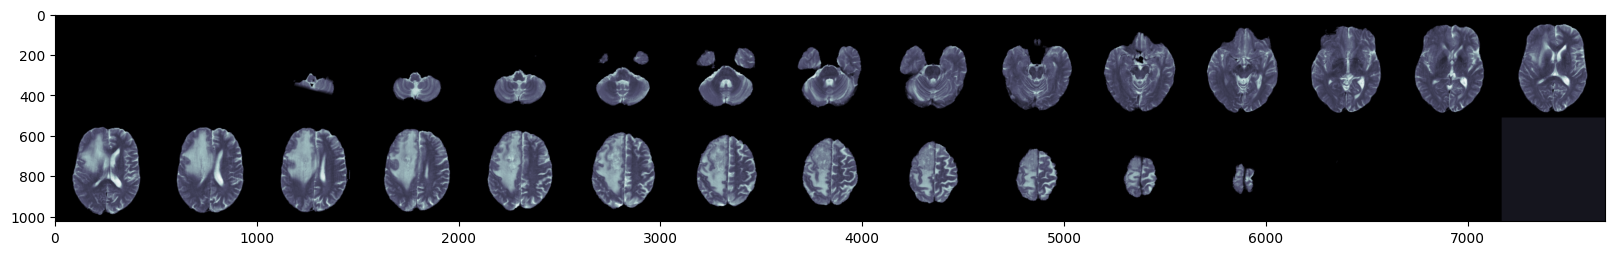

In [102]:
plt.figure(figsize=(20,20))
plt.imshow(montage(concat_images, grid_shape=(2,15)),cmap='bone')

## NIFITI file load example
* nifit file을 읽기 위해서 dicom을 nifiti로 바꿔봅시다. \\
* 우선적으로 dicom2nifti를 이용해서 dicom을 nifitif로 변형하고
* niblbe로 nifiti파일을 읽어옵니다.

In [95]:
!pip install nibabel
!pip install dicom2nifti

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.7 MB/s eta 0:00:00


In [96]:
import dicom2nifti
import nibabel as nib
# nifiti로 변경하는 코드
dicom2nifti.convert_directory("/content/drive/MyDrive/Medical_AI/brain_images/00825/T2w", "./") # 파일 위치, 저장될 위치
nifiti_path = './8_t2w.nii.gz'

In [97]:
# nifti file load
sample_img = nib.load(nifiti_path)
sample_img = np.asanyarray(sample_img.dataobj)

In [99]:
print(f'nifit file shape(height, width, depth) : {sample_img.shape}')
type(sample_img)

nifit file shape(height, width, depth) : (512, 512, 29)


numpy.ndarray

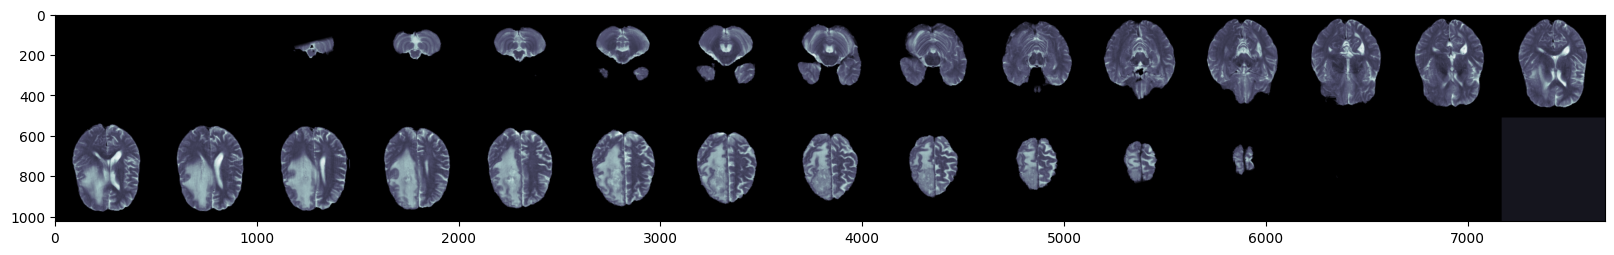

In [103]:
# plot 3d image use motage library
transpose_img = sample_img.transpose((2,1,0))
plt.figure(figsize=(20,20))
plt.imshow(montage(transpose_img, grid_shape=(2,15)),cmap='bone')

3d 로 만들게 되어지면 위치가 돌려서 전처리나 input을 다양하게 넣기에 좋아집니다.
* 이를 3d로 읽어오기 위해서 GIF로 만들어봅시다.

In [108]:
dicom2nifti.convert_directory("/content/drive/MyDrive/Medical_AI/brain_images/00825/T2w", "./")
nifiti_path = './8_t2w.nii.gz'

In [109]:
# nifti file load
sample_img = nib.load(nifiti_path)
sample_img = np.asanyarray(sample_img.dataobj)
print(f'nifit file shape(height, width, depth) : {sample_img.shape}')
# plot 3d image use motage library
transpose_img = sample_img.transpose((2,1,0))

nifit file shape(height, width, depth) : (512, 512, 29)


In [110]:
from IPython.display import Image as show_gif # Jupyter Notebook에서 GIF를 표시하는 데 사용
import matplotlib.animation as anim # Matplotlib을 사용하여 애니메이션(GIF) 생성
class ImageToGIF:
    """Create GIF without saving image files."""
    def __init__(self,
                 size=(500, 500), # 이미지 크기
                 xy_text=(80, 30), # 텍스트(라벨) 위치 (x, y)
                 dpi=100, # 이미지 해상도(Dots Per Inch, 화질)
                 cmap='CMRmap'): # 컬러맵 설정 (MRI, CT, X-ray 이미지에서 색상 조정 가능)

        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / dpi, size[1] / dpi)
        self.xy_text = xy_text
        self.cmap = cmap

        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.images = []

    def add(self, image, label, with_mask=False):
        plt.set_cmap(self.cmap)
        plt_img = self.ax.imshow(image, animated=True)
        plt_text = self.ax.text(*self.xy_text, label, color='red')
        to_plot = [plt_img, plt_text]
        self.images.append(to_plot)
        plt.close()

    def save(self, filename, fps):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=fps)

# sample_data_gif = ImageToGIF()

In [ ]:
!sudo apt-get install imagemagick

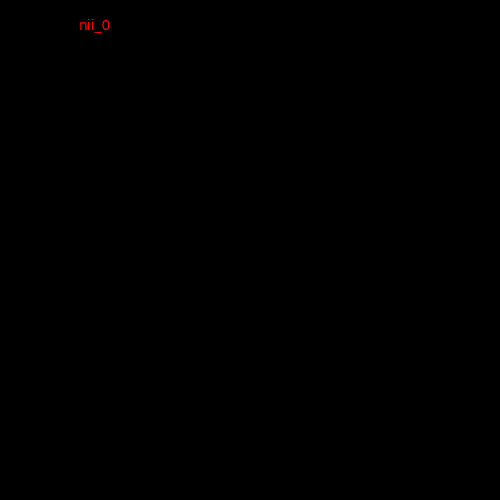

In [111]:
sample_data_gif = ImageToGIF()
label = nifiti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

label = Path(nifiti_path).stem  # 'brain_scan'
filename = f"{label}_3d_2d.gif"  # 'brain_scan_3d_2d.gif'

for i in range(transpose_img.shape[0]):
    image = transpose_img[i]
    sample_data_gif.add(image,label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=15)
show_gif(filename, format='png')

각도 바꾸기

In [112]:
transpose_img.shape

(29, 512, 512)

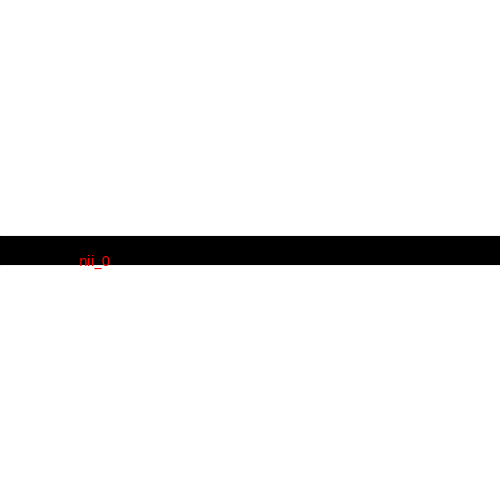

In [122]:
sample_data_gif = ImageToGIF()
label = nifiti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

label = Path(nifiti_path).stem  # 'brain_scan'
filename = f"{label}_3d_2d.gif"  # 'brain_scan_3d_2d.gif'

for i in range(transpose_img.shape[2]):
    image = np.rot90(transpose_img[...,i], k=2, axes=(1,0))
    sample_data_gif.add(image,label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=15)
show_gif(filename, format='png')

## 해당 dcm의 경우 z 축이 29개밖에없어서 조금 낮게보임!

```
label = nifiti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'
```

파일 경로에서 라벨을 추출하여 GIF 파일명 생성

예를 들어, nifiti_path = '/content/brain_scan.nii.gz'라면:

'/' → '.' 변환 → 'content.brain_scan.nii.gz'

split('.')[-2] → 'nii'(확장자 제거된 파일명)

filename = 'nii_3d_2d.gif'

```
for i in range(transpose_img.shape[2]):
    image = np.rot90(transpose_img[...,i], k=2, axes=(1,0))
    sample_data_gif.add(image,label=f'{label}_{str(i)}')
```

3D 의료 데이터를 2D Slice(단면)로 변환하여 GIF에 추가하는 과정

<br>

- ```transpose_img.shape[2]```:

transpose_img는 (높이, 너비, 깊이) = (H, W, D) 형태의 3D 배열

shape[2]는 깊이(Depth), 즉 z축 방향의 슬라이스 개수를 의미

for i in range(D) → 모든 슬라이스를 순차적으로 가져옴

<br>

- ```image = transpose_img[..., i]```:

[..., i] → i번째 2D Slice(단면) 가져오기


<br>

- ```np.rot90(image, k=2, axes=(1,0))```:

이미지를 180도(90도 × 2) 회전하여 정렬

axes=(1,0) → 가로(X), 세로(Y) 기준 회전


<br>

- ```sample_data_gif.add(image, label=f'{label}_{str(i)}')```:

GIF에 이미지 추가, 라벨은 파일명_슬라이스번호 형식으로 지정

예: brain_scan_0, brain_scan_1, ...


<br>

- 회전(np.rot90)이 필요한 이유:

MRI, CT 스캔 데이터는 축 기준 정렬이 다를 수 있음

일반적으로 이미지가 수직 방향(머리-발)으로 저장됨

rot90을 사용하여 X-Y 평면을 맞추는 작업을 수행